<h1 align="center">EXPLORATORY DATA ANALYSIS</h1>
<H3 align="right">Name: Rudrani Ghosh</H3>

In [375]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("/Users/rudranighosh/Downloads/Healthcare Providers.csv")
data.head()

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


In [376]:
# Descriptive statistics
data.describe()

,index,National Provider Identifier,Zip Code of the Provider
count,1.000000e+05,1.000000e+05,1.000000e+05
mean,4.907646e+06,1.498227e+09,4.163820e+08
std,2.839633e+06,2.874125e+08,3.082566e+08
min,2.090000e+02,1.003001e+09,6.010000e+02
25%,2.458791e+06,1.245669e+09,1.426300e+08
50%,4.901266e+06,1.497847e+09,3.633025e+08
75%,7.349450e+06,1.740374e+09,6.819881e+08
max,9.847440e+06,1.993000e+09,9.990166e+08


In [377]:
# information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  object 
 3   First Name of the Provider                                95745 non-null   object 
 4   Middle Initial of the Provider                            70669 non-null   object 
 5   Credentials of the Provider                               92791 non-null   object 
 6   Gender of the Provider                                    95746 non-null   object 
 7   Entity Type of the Provider                               100000 non-null  object 
 8   Stree

<h2>Converting Object to Numeric Type </h2>

In [378]:
numeric_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'
]

for column in numeric_columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')
    
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  object 
 3   First Name of the Provider                                95745 non-null   object 
 4   Middle Initial of the Provider                            70669 non-null   object 
 5   Credentials of the Provider                               92791 non-null   object 
 6   Gender of the Provider                                    95746 non-null   object 
 7   Entity Type of the Provider                               100000 non-null  object 
 8   Stree

<h2>Looking for Missing Values and imputing them with Mean </h2>

In [379]:
# missing values
print(data.isnull().sum())


index                                                           0
National Provider Identifier                                    0
Last Name/Organization Name of the Provider                     0
First Name of the Provider                                   4255
Middle Initial of the Provider                              29331
Credentials of the Provider                                  7209
Gender of the Provider                                       4254
Entity Type of the Provider                                     0
Street Address 1 of the Provider                                0
Street Address 2 of the Provider                            59363
City of the Provider                                            0
Zip Code of the Provider                                        0
State Code of the Provider                                      0
Country Code of the Provider                                    0
Provider Type                                                   0
Medicare P

In [380]:
# Imputation of missing values with mean
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

print(data.isnull().sum())

index                                                           0
National Provider Identifier                                    0
Last Name/Organization Name of the Provider                     0
First Name of the Provider                                   4255
Middle Initial of the Provider                              29331
Credentials of the Provider                                  7209
Gender of the Provider                                       4254
Entity Type of the Provider                                     0
Street Address 1 of the Provider                                0
Street Address 2 of the Provider                            59363
City of the Provider                                            0
Zip Code of the Provider                                        0
State Code of the Provider                                      0
Country Code of the Provider                                    0
Provider Type                                                   0
Medicare P

<h2>Looking for Duplicate Values </h2>

In [381]:
# Check for duplicates
print(data.duplicated().sum())


0


<h2>Data Preprocessing </h2>

In [382]:
# Merging the name columns into a single column 
data['Full Name'] = data['First Name of the Provider'].fillna('') + ' ' + \
                    data['Middle Initial of the Provider'].fillna('') + ' ' + \
                    data['Last Name/Organization Name of the Provider'].fillna('')
data['Full Name'] = data['Full Name'].str.strip()

data = data.drop(columns=['Last Name/Organization Name of the Provider', 
                          'First Name of the Provider', 
                          'Middle Initial of the Provider'])

data.head()

,index,National Provider Identifier,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,...,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Full Name
0,8774979,1891106191,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,SAINT LOUIS,631041004.0,MO,...,"Initial hospital inpatient care, typically 70 ...",N,27.0,24.0,27.0,200.587778,305.211111,157.262222,160.908889,SATYASREE UPADHYAYULA
1,3354385,1346202256,M.D.,F,I,2950 VILLAGE DR,NaN,FAYETTEVILLE,283043815.0,NC,...,"Screening mammography, bilateral (2-view study...",N,175.0,175.0,175.0,123.730000,548.800000,118.830000,135.315257,WENDY P JONES
2,3001884,1306820956,DPM,M,I,20 WASHINGTON AVE,STE 212,NORTH HAVEN,64732343.0,CT,...,"Established patient home visit, typically 25 m...",N,32.0,13.0,32.0,90.650000,155.000000,64.439688,60.595937,RICHARD W DUROCHER
3,7594822,1770523540,MD,M,I,5746 N BROADWAY ST,NaN,KANSAS CITY,641183998.0,MO,...,"Urinalysis, manual test",N,20.0,18.0,20.0,3.500000,5.000000,3.430000,3.430000,JASPER FULLARD
4,746159,1073627758,DO,M,I,875 MILITARY TRL,SUITE 200,JUPITER,334585700.0,FL,...,Injection beneath the skin or into muscle for ...,N,33.0,24.0,31.0,26.520000,40.000000,19.539394,19.057576,ANTHONY E PERROTTI


In [383]:
# Merging the address columns 
data['Full Address'] = data['Street Address 1 of the Provider'].fillna('') + ' ' + \
                       data['Street Address 2 of the Provider'].fillna('')
data['Full Address'] = data['Full Address'].str.strip()

data = data.drop(columns=['Street Address 1 of the Provider', 
                          'Street Address 2 of the Provider'])

data.head()

,index,National Provider Identifier,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,...,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Full Name,Full Address
0,8774979,1891106191,M.D.,F,I,SAINT LOUIS,631041004.0,MO,US,Internal Medicine,...,N,27.0,24.0,27.0,200.587778,305.211111,157.262222,160.908889,SATYASREE UPADHYAYULA,1402 S GRAND BLVD FDT 14TH FLOOR
1,3354385,1346202256,M.D.,F,I,FAYETTEVILLE,283043815.0,NC,US,Obstetrics & Gynecology,...,N,175.0,175.0,175.0,123.730000,548.800000,118.830000,135.315257,WENDY P JONES,2950 VILLAGE DR
2,3001884,1306820956,DPM,M,I,NORTH HAVEN,64732343.0,CT,US,Podiatry,...,N,32.0,13.0,32.0,90.650000,155.000000,64.439688,60.595937,RICHARD W DUROCHER,20 WASHINGTON AVE STE 212
3,7594822,1770523540,MD,M,I,KANSAS CITY,641183998.0,MO,US,Internal Medicine,...,N,20.0,18.0,20.0,3.500000,5.000000,3.430000,3.430000,JASPER FULLARD,5746 N BROADWAY ST
4,746159,1073627758,DO,M,I,JUPITER,334585700.0,FL,US,Internal Medicine,...,N,33.0,24.0,31.0,26.520000,40.000000,19.539394,19.057576,ANTHONY E PERROTTI,875 MILITARY TRL SUITE 200


In [384]:
# Standardize credentials
data['Credentials of the Provider'] = data['Credentials of the Provider'].str.replace(r'\.', '', regex=True).str.upper()

data.head()

,index,National Provider Identifier,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,...,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Full Name,Full Address
0,8774979,1891106191,MD,F,I,SAINT LOUIS,631041004.0,MO,US,Internal Medicine,...,N,27.0,24.0,27.0,200.587778,305.211111,157.262222,160.908889,SATYASREE UPADHYAYULA,1402 S GRAND BLVD FDT 14TH FLOOR
1,3354385,1346202256,MD,F,I,FAYETTEVILLE,283043815.0,NC,US,Obstetrics & Gynecology,...,N,175.0,175.0,175.0,123.730000,548.800000,118.830000,135.315257,WENDY P JONES,2950 VILLAGE DR
2,3001884,1306820956,DPM,M,I,NORTH HAVEN,64732343.0,CT,US,Podiatry,...,N,32.0,13.0,32.0,90.650000,155.000000,64.439688,60.595937,RICHARD W DUROCHER,20 WASHINGTON AVE STE 212
3,7594822,1770523540,MD,M,I,KANSAS CITY,641183998.0,MO,US,Internal Medicine,...,N,20.0,18.0,20.0,3.500000,5.000000,3.430000,3.430000,JASPER FULLARD,5746 N BROADWAY ST
4,746159,1073627758,DO,M,I,JUPITER,334585700.0,FL,US,Internal Medicine,...,N,33.0,24.0,31.0,26.520000,40.000000,19.539394,19.057576,ANTHONY E PERROTTI,875 MILITARY TRL SUITE 200


<h2>GRAPHS: </h2>


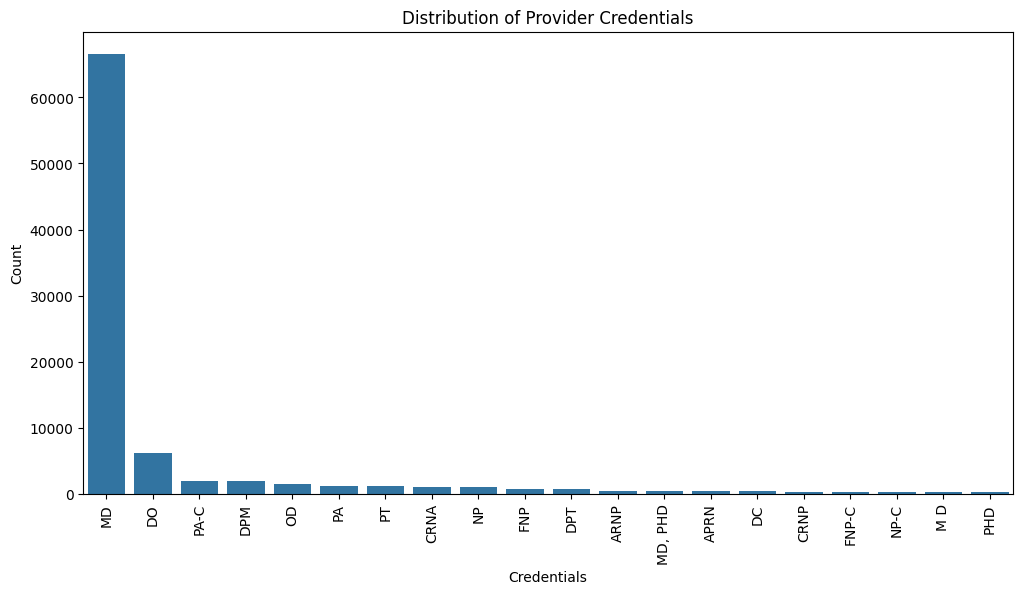

In [385]:
# Plot bar plot for Credentials of the Provider
credentials_counts = data['Credentials of the Provider'].value_counts().head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=credentials_counts.index, y=credentials_counts.values)
plt.title('Distribution of Provider Credentials')
plt.xlabel('Credentials')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

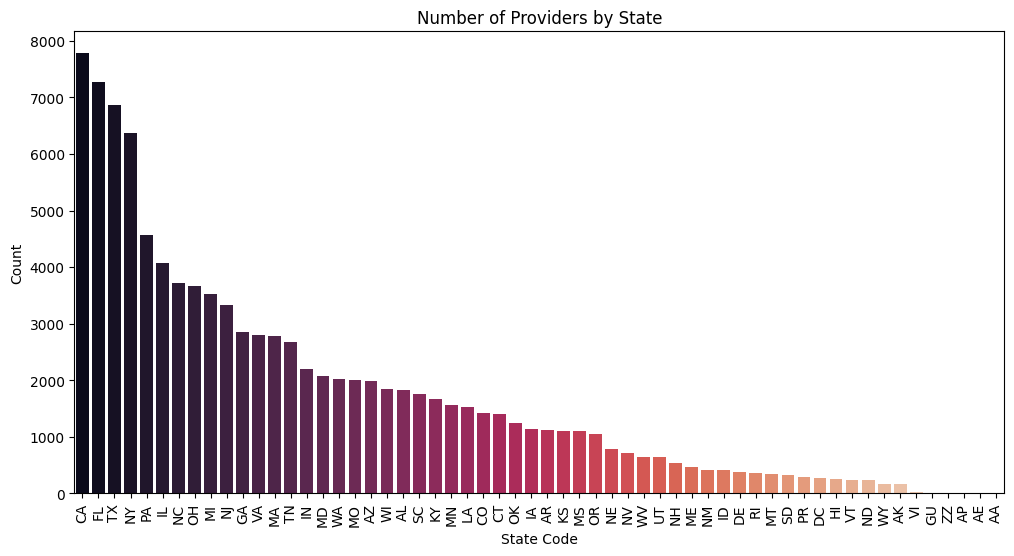

In [386]:
state_counts = data['State Code of the Provider'].value_counts()

# bar graph for State Code of the Provider
plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts.index, y=state_counts.values, palette='rocket')
plt.title('Number of Providers by State')
plt.xlabel('State Code')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

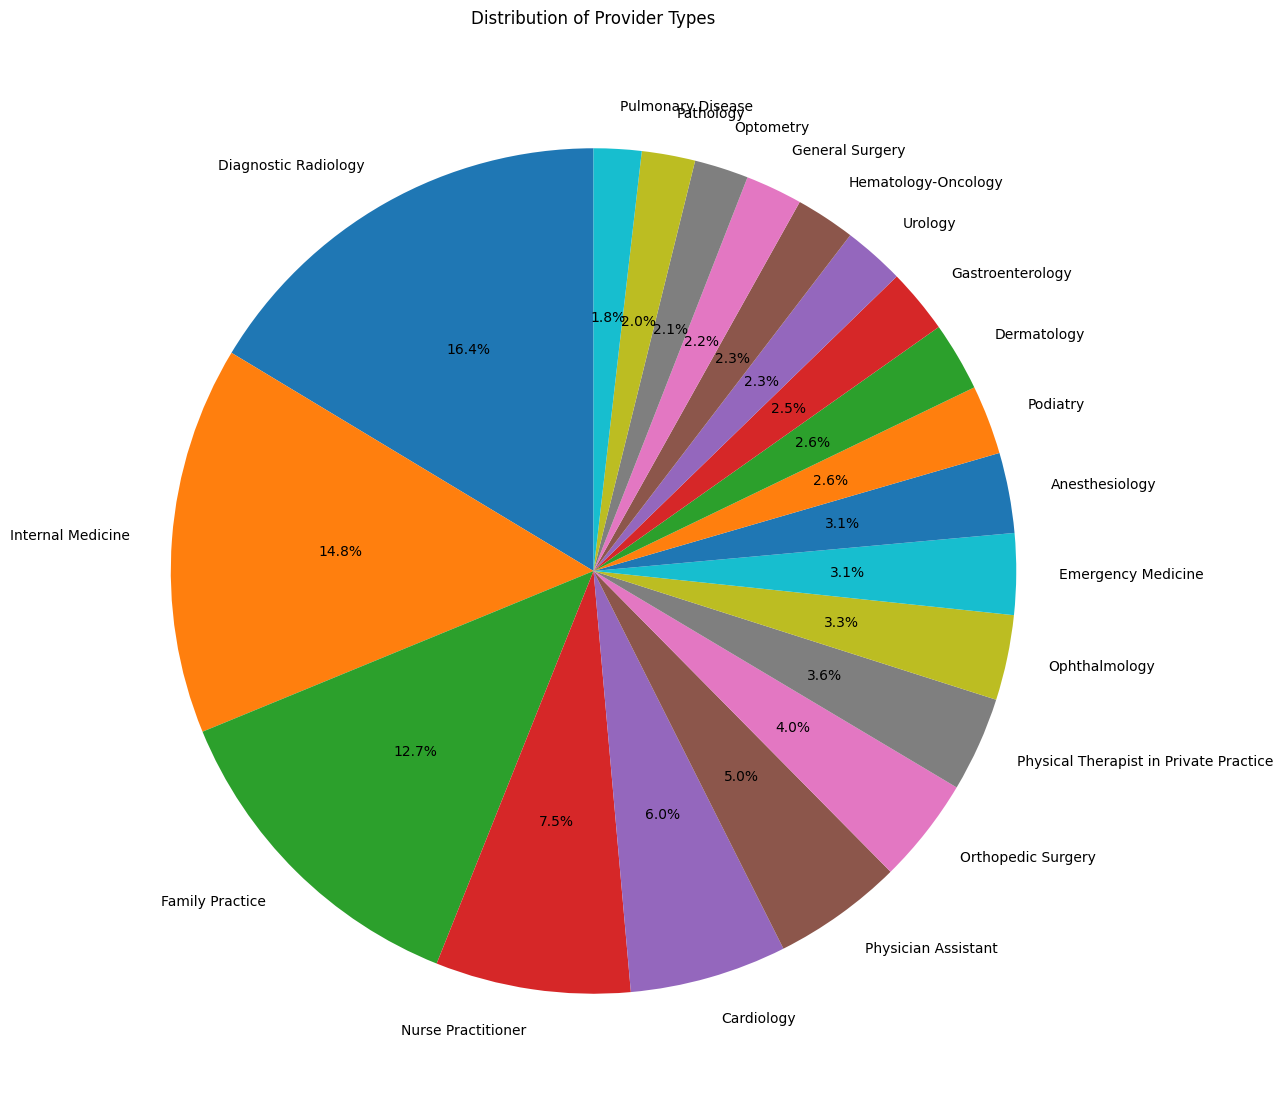

In [387]:
provider_type_counts = data['Provider Type'].value_counts().head(20)

# pie chart for Provider Types
plt.figure(figsize=(12, 14))
plt.pie(provider_type_counts, labels=provider_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Provider Types')
plt.axis('equal')  
plt.show()


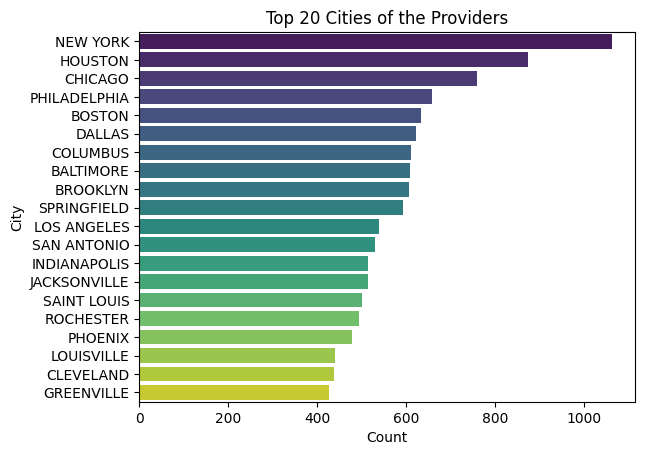

In [388]:
# occurrences of each city
city_counts = data['City of the Provider'].value_counts().head(20)

# Plot of top 20 cities
sns.barplot(x=city_counts.values, y=city_counts.index, palette='viridis')
plt.title('Top 20 Cities of the Providers')
plt.xlabel('Count')
plt.ylabel('City')
plt.show()

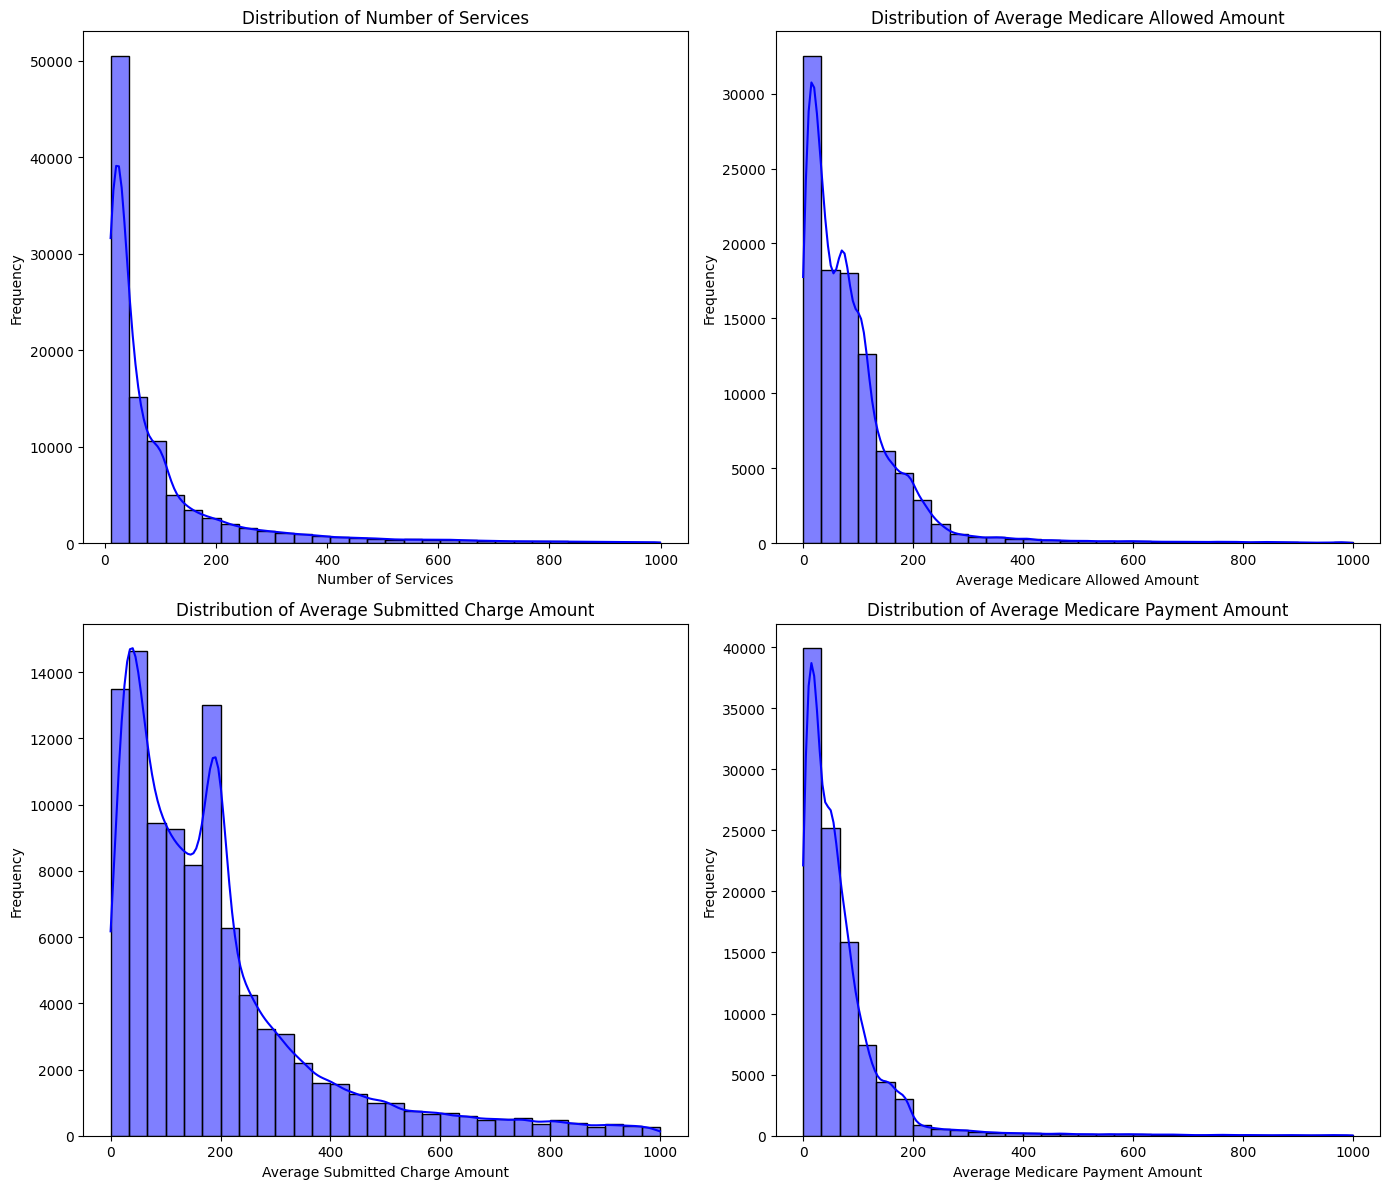

In [389]:
numeric_columns = [
    'Number of Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount'
]

for column in numeric_columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')

plt.figure(figsize=(14, 12))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[column].dropna(), bins=30, kde=True, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

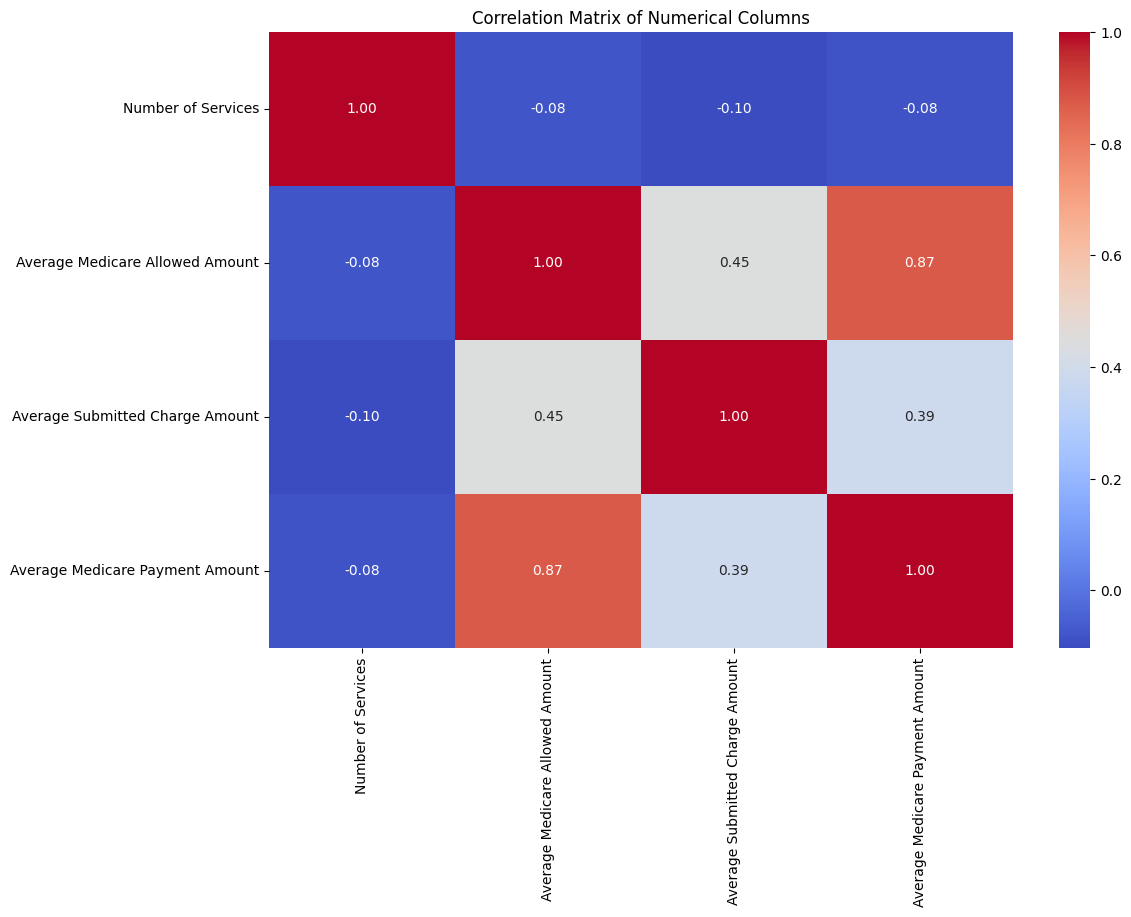

In [390]:

corr_matrix = data[numeric_columns].corr()

#correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

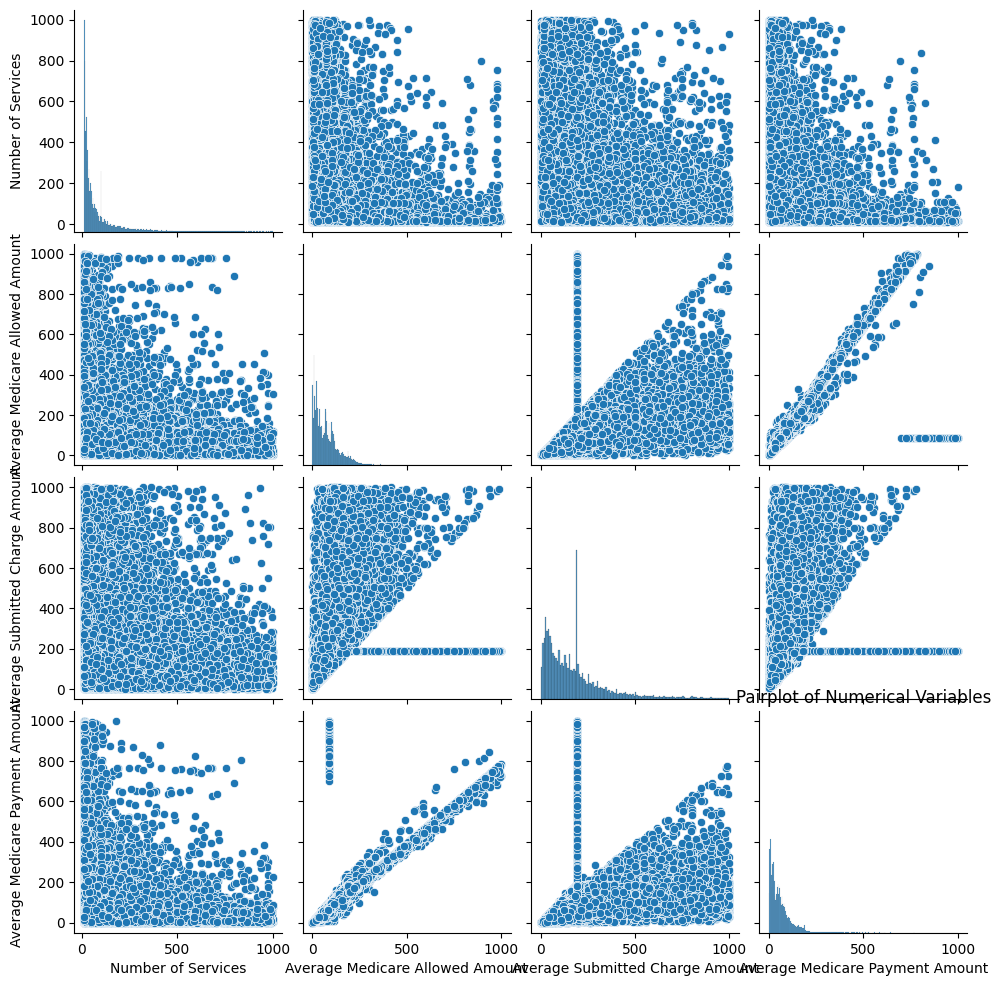

In [391]:
sns.pairplot(data[numeric_columns])
plt.title('Pairplot of Numerical Variables')
plt.show()


<h2>Bivariate Analysis </h2>

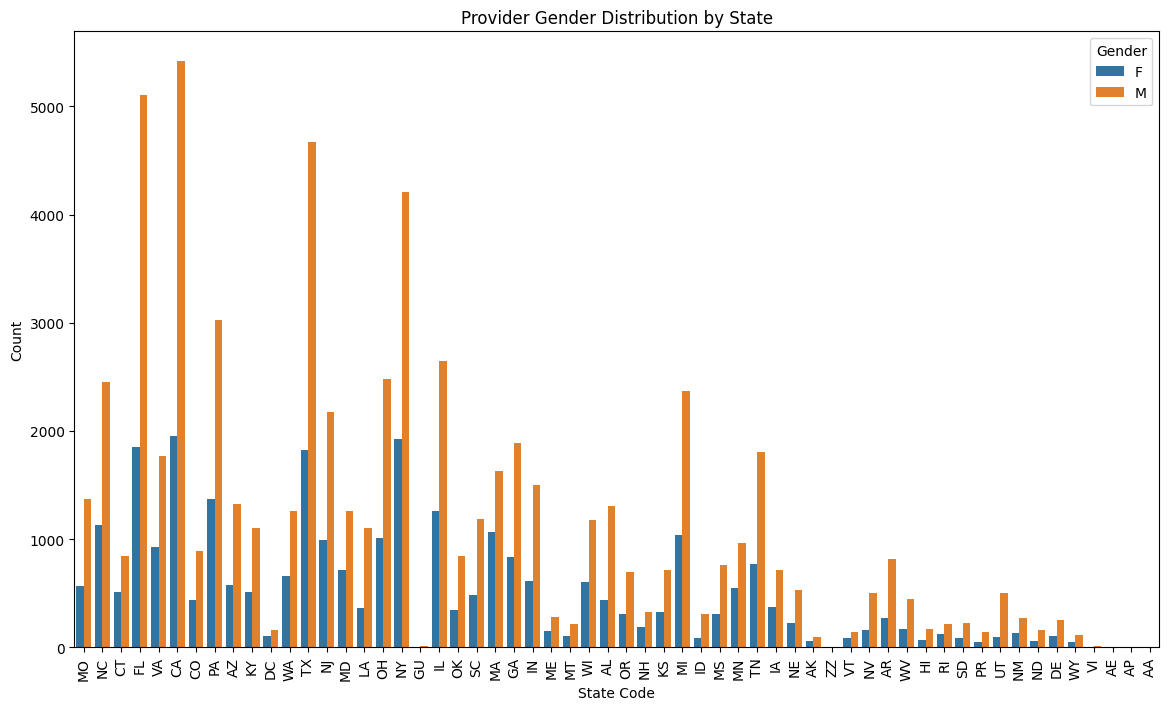

In [392]:
#Countplot of Provider Gender Distribution by State

plt.figure(figsize=(14, 8))
sns.countplot(x='State Code of the Provider', hue='Gender of the Provider', data=data)
plt.title('Provider Gender Distribution by State')
plt.xlabel('State Code')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Gender')
plt.show()


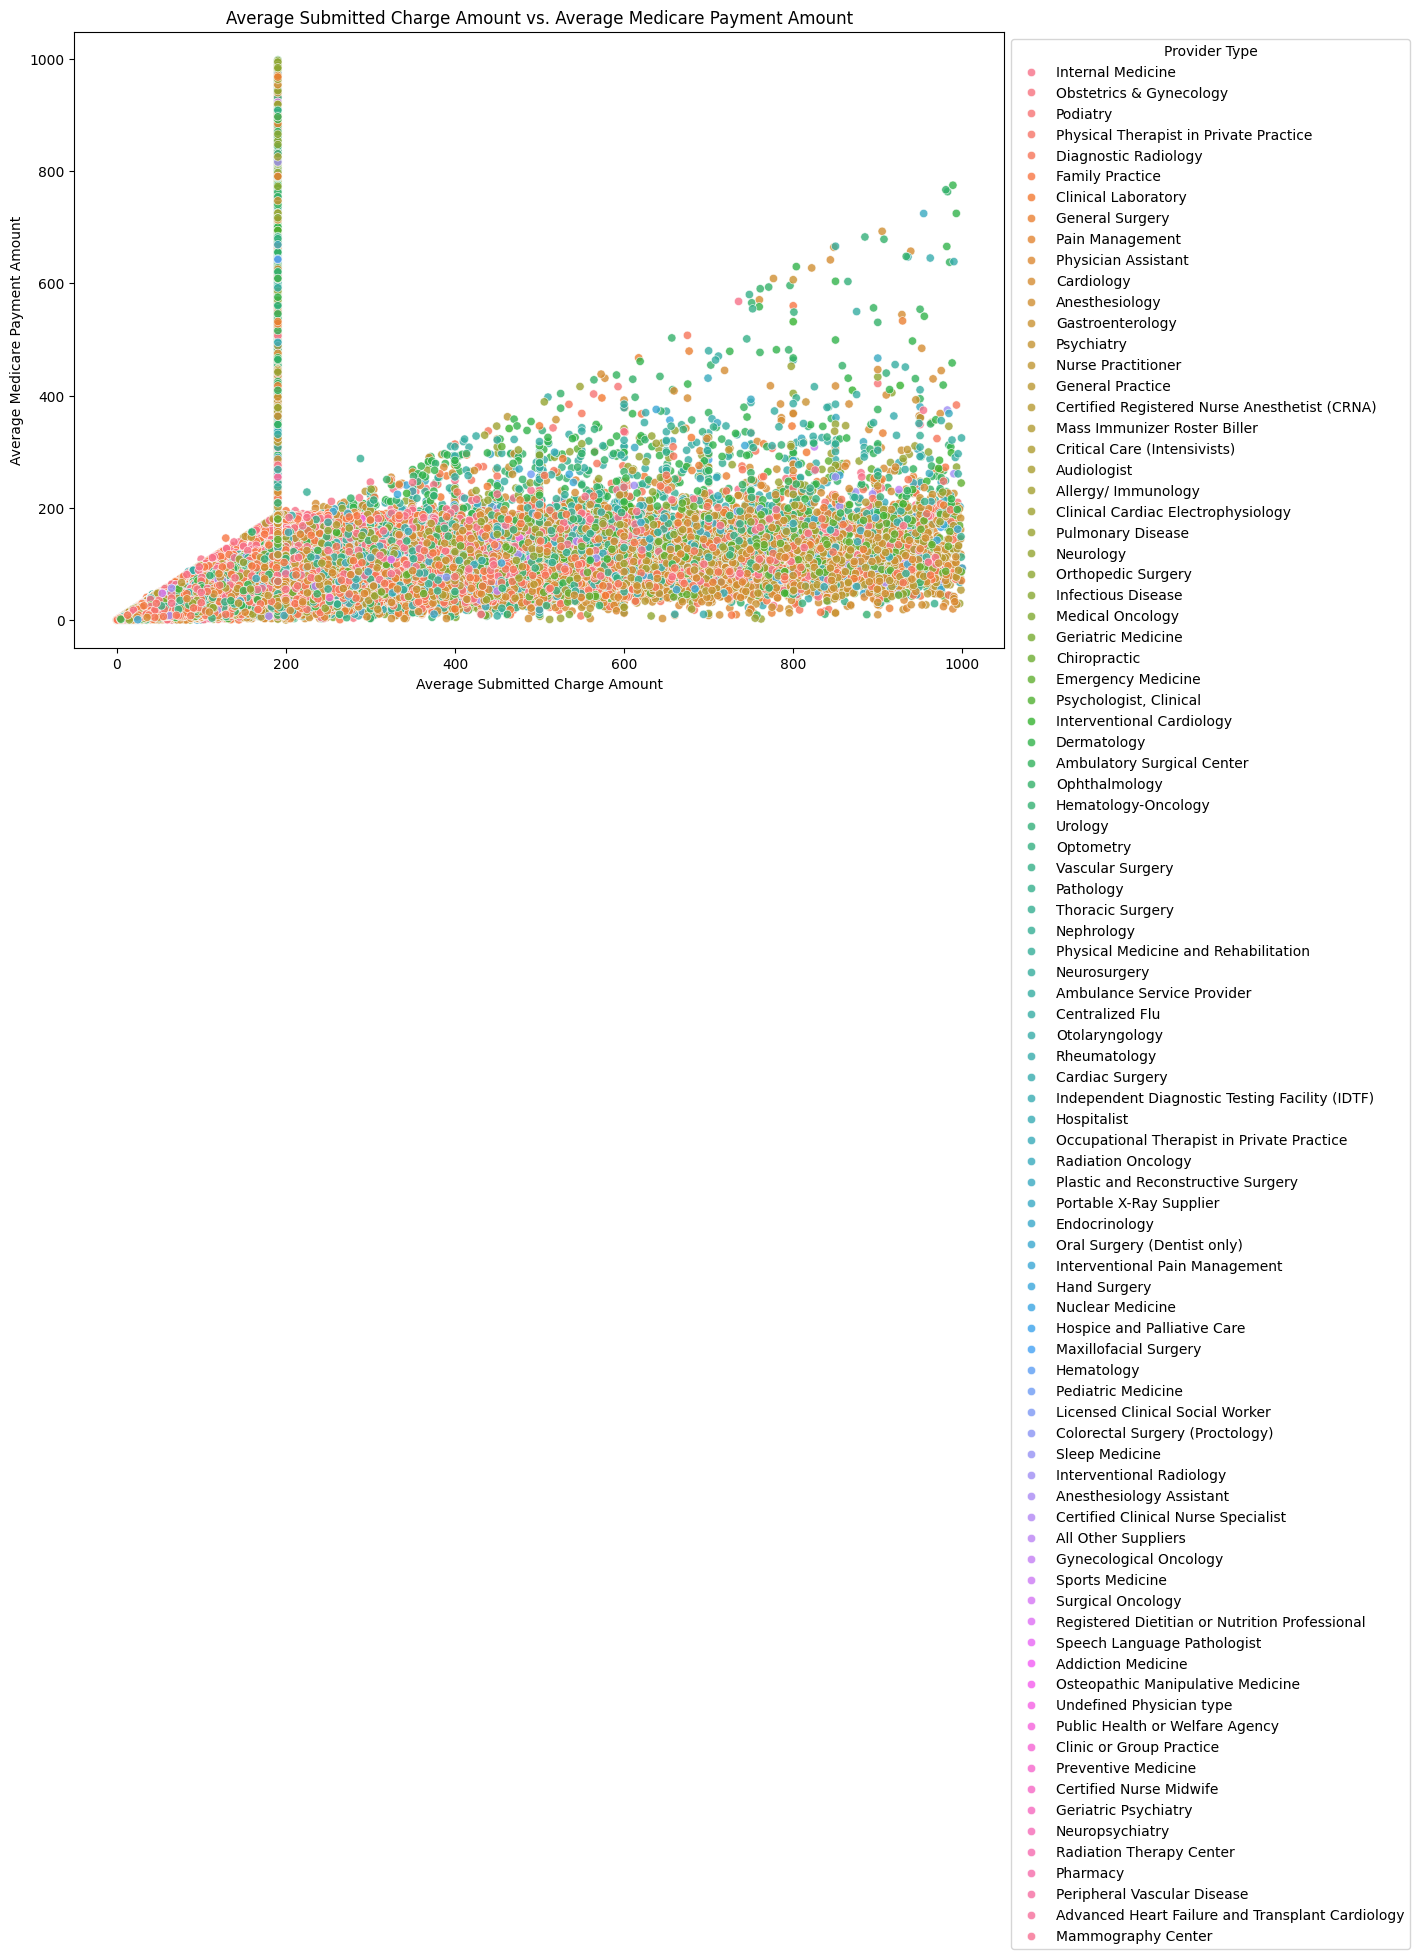

In [393]:
#Scatter Plot of Average Submitted Charge vs. Average Payment

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Average Submitted Charge Amount', y='Average Medicare Payment Amount', data=data, hue='Provider Type', alpha=0.8)
plt.title('Average Submitted Charge Amount vs. Average Medicare Payment Amount')
plt.xlabel('Average Submitted Charge Amount')
plt.ylabel('Average Medicare Payment Amount')
plt.legend(title='Provider Type', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


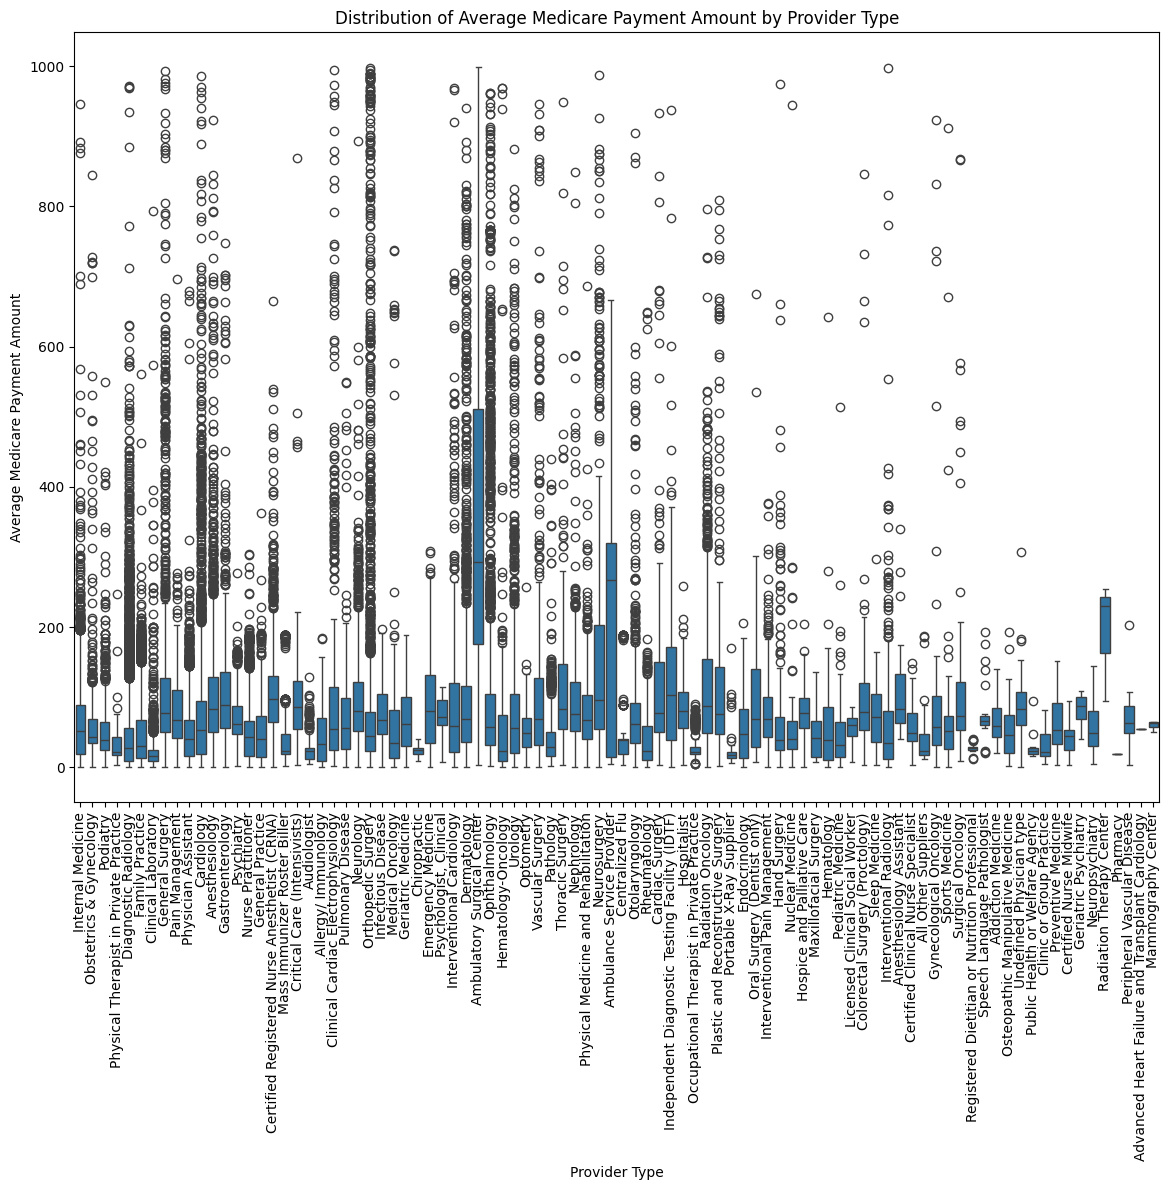

In [394]:
#Boxplot of Average Medicare Payment Amount by Provider Type

plt.figure(figsize=(14, 10))
sns.boxplot(x='Provider Type', y='Average Medicare Payment Amount', data=data)
plt.title('Distribution of Average Medicare Payment Amount by Provider Type')
plt.xlabel('Provider Type')
plt.ylabel('Average Medicare Payment Amount')
plt.xticks(rotation=90)
plt.show()


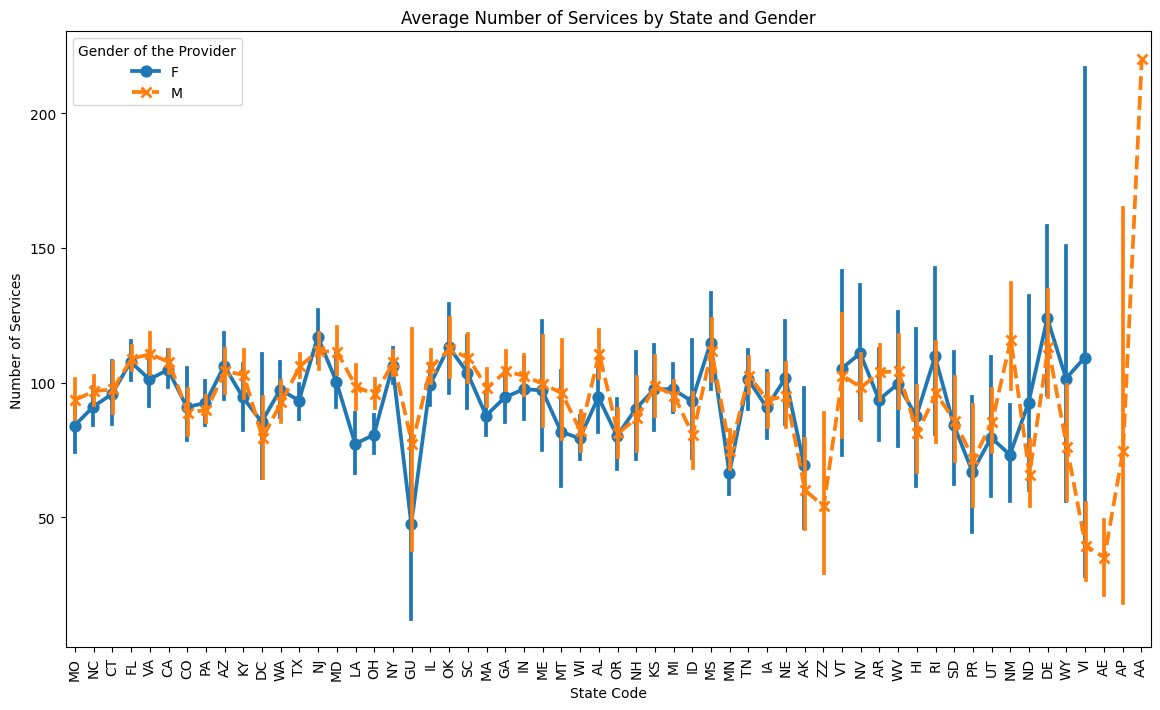

In [395]:
# point plot to show the relationship between average Number of Services by State Code of the Provider and Gender

plt.figure(figsize=(14, 8))
sns.pointplot(x='State Code of the Provider', y='Number of Services', hue='Gender of the Provider', data=data, dodge=True, markers=["o", "x"], linestyles=["-", "--"])
plt.title('Average Number of Services by State and Gender')
plt.xlabel('State Code')
plt.ylabel('Number of Services')
plt.xticks(rotation=90)
plt.show()



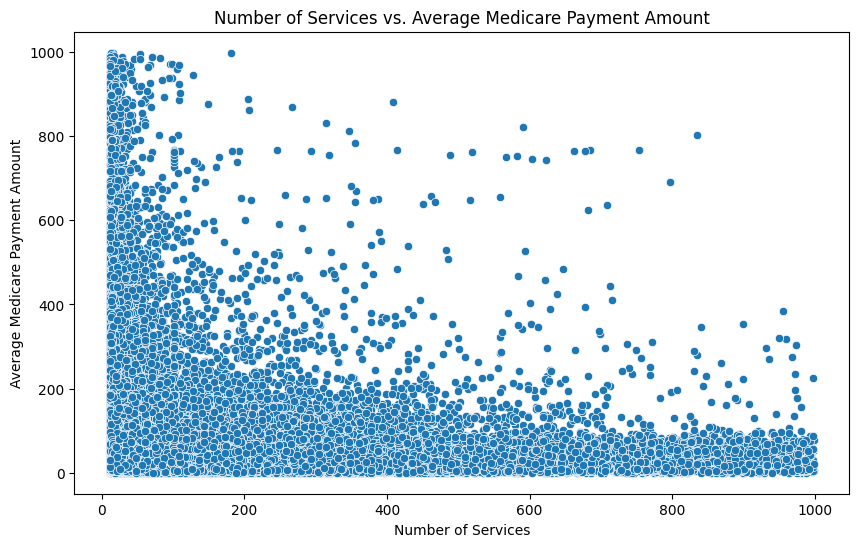

In [396]:
#Correlation between Number of Services and Payment Amounts

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Number of Services', y='Average Medicare Payment Amount', data=data)
plt.title('Number of Services vs. Average Medicare Payment Amount')
plt.xlabel('Number of Services')
plt.ylabel('Average Medicare Payment Amount')
plt.show()


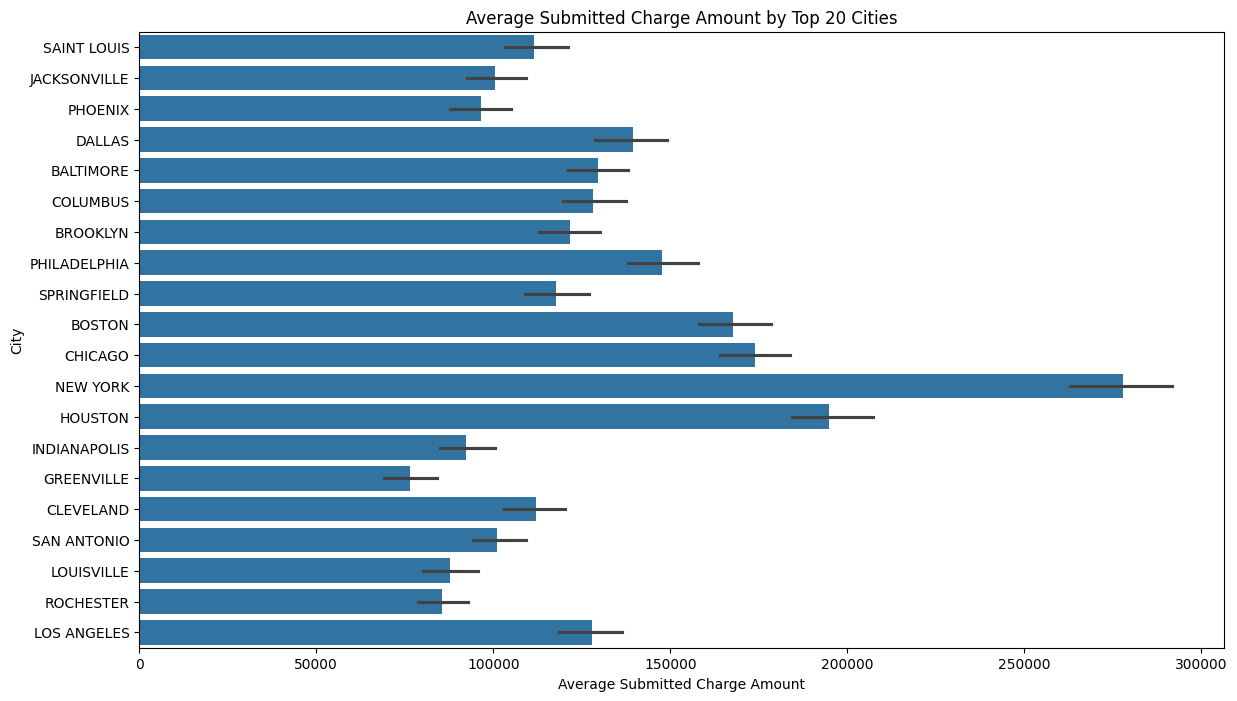

In [397]:
#Bargraph of Average Submitted Charge Amount by City:

top_20_cities = data['City of the Provider'].value_counts().head(20).index
filtered_city_data = data[data['City of the Provider'].isin(top_20_cities)]

plt.figure(figsize=(14, 8))
sns.barplot(x='Average Submitted Charge Amount', y='City of the Provider', data=filtered_city_data, estimator=sum)
plt.title('Average Submitted Charge Amount by Top 20 Cities')
plt.xlabel('Average Submitted Charge Amount')
plt.ylabel('City')
plt.show()


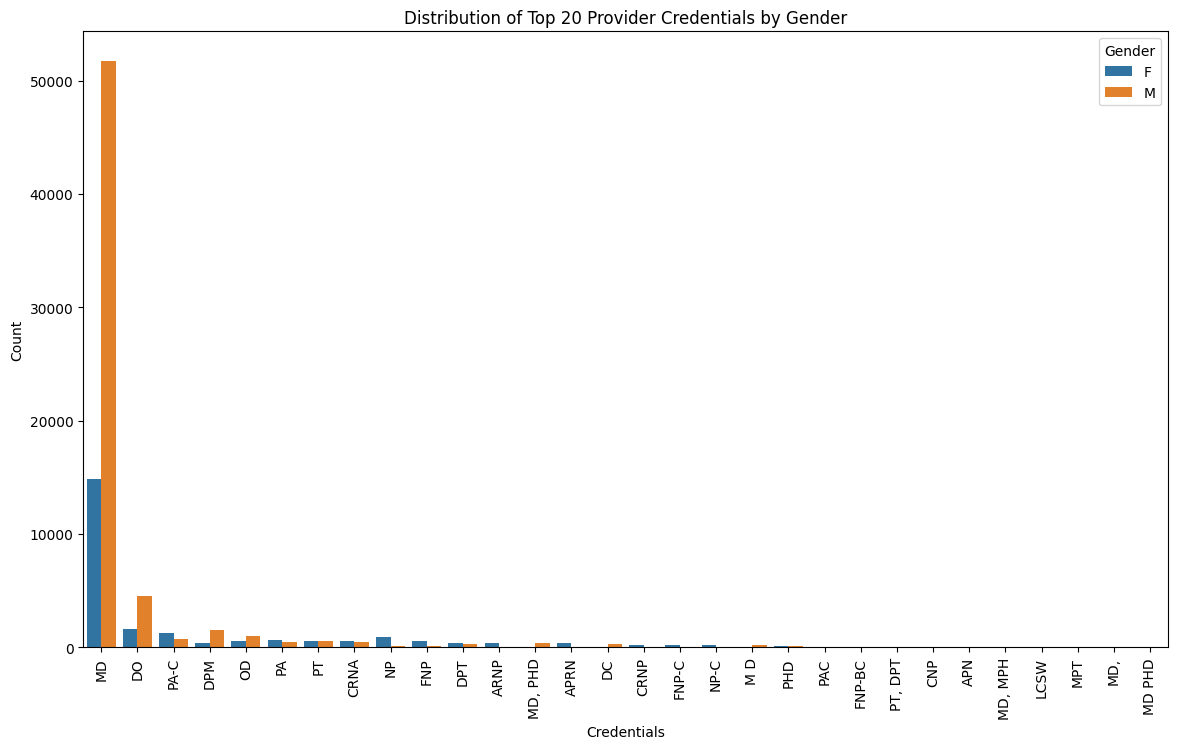

In [398]:
#Bargraph of Distribution of Top 20 Provider Credentials by Gender
data['Credentials of the Provider'] = data['Credentials of the Provider'].str.strip()
data['Gender of the Provider'] = data['Gender of the Provider'].str.strip()
top_20_credentials = data['Credentials of the Provider'].value_counts().head(20).index

# Filtered data to include only rows with the top 20 credentials
filtered_data = data[data['Credentials of the Provider'].isin(top_20_credentials)]

plt.figure(figsize=(14, 8))
sns.countplot(data=filtered_data, x='Credentials of the Provider', hue='Gender of the Provider', order=top_30_credentials)
plt.title('Distribution of Top 20 Provider Credentials by Gender')
plt.xlabel('Credentials')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Gender')
plt.show()


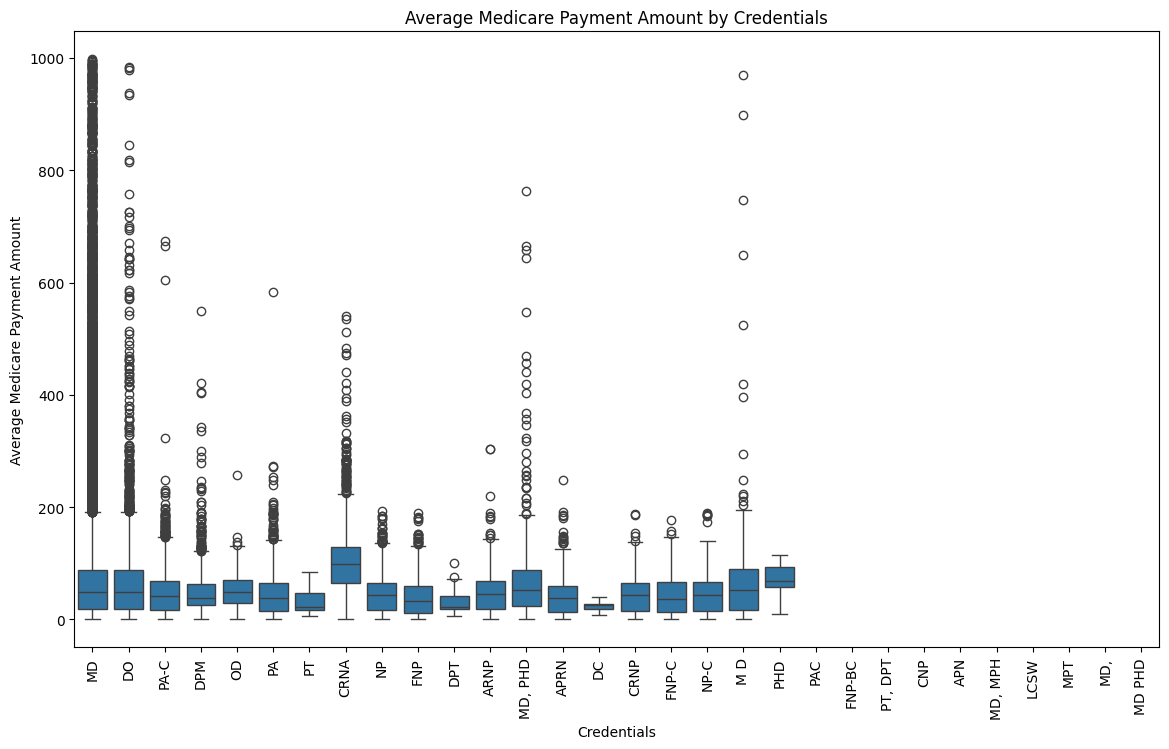

In [399]:
#Average Medicare Payment Amount by Credentials

plt.figure(figsize=(14, 8))
sns.boxplot(x='Credentials of the Provider', y='Average Medicare Payment Amount', data=filtered_data, order=top_30_credentials)
plt.title('Average Medicare Payment Amount by Credentials')
plt.xlabel('Credentials')
plt.ylabel('Average Medicare Payment Amount')
plt.xticks(rotation=90)
plt.show()
